## Import Libraries

In [68]:
import numpy as np
import pandas as pd

## Import Data

In [69]:
loan_data_preprocessed_backup = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_2007_2014_preprocessed.csv')

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/3033525631.py:1: DtypeWarning: Columns (21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_2007_2014_preprocessed.csv')


## Explore Data

In [70]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [71]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off', 
                                            'Does not meet the credit policy. Status:Charged Off'])]
loan_data_defaults.shape

(43236, 209)

In [72]:
loan_data_defaults.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
                        ..
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
good_bad                 0
Length: 209, dtype: int64

### Independent Variables

In [73]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/1155172996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/1155172996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


### Dependent Variables

In [74]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
loan_data_defaults['recovery_rate'].describe()

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/2274281169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [75]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0, 0, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'].describe()

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/1865273664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1, 1, loan_data_defaults['recovery_rate'])
/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/1865273664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0, 0, loan_data_defaults['recovery_rate'])


count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [76]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/ loan_data_defaults['funded_amnt']
loan_data_defaults['CCF'].describe()

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/2102671859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/ loan_data_defaults['funded_amnt']


count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [77]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

### Explore Dependent Variables

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

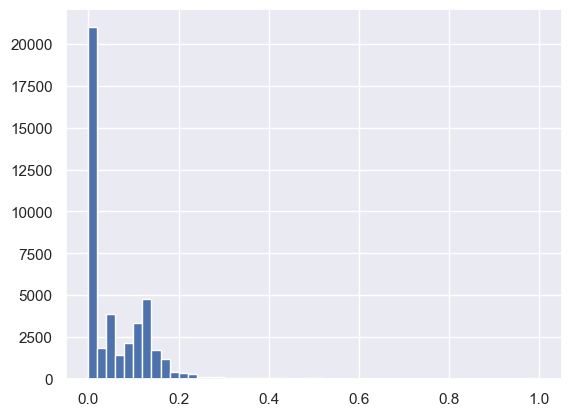

In [79]:
plt.hist(loan_data_defaults['recovery_rate'], bins=50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

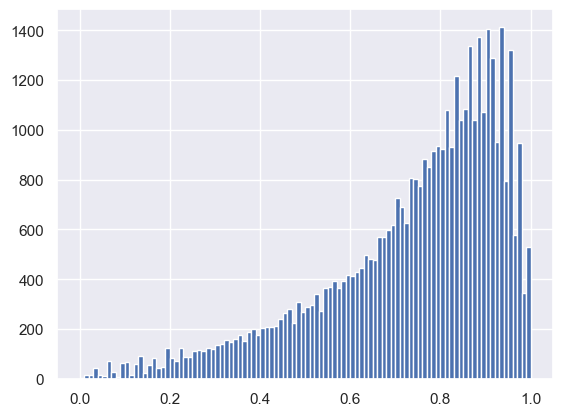

In [80]:
plt.hist(loan_data_defaults['CCF'], bins=100)

In [81]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/4022416701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)


## LGD Model

### Splitting Data

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate_0_1', 'CCF'], axis=1), loan_data_defaults['recovery_rate_0_1'], test_size=0.2, random_state=42)

### Preparing the Inputs

In [84]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [85]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [86]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis=1)

### Estimating the Model

In [87]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) 
        Cramer_Rao = np.linalg.inv(F_ij) 
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates 
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] 
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [88]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/ds-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
feature_name = lgd_inputs_stage_1_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-8.637823e-05,NaN
1,grade:A,-1.054488e-05,9.999001e-01
2,grade:B,-6.824349e-05,9.992010e-01
3,grade:C,-1.356662e-04,9.983566e-01
4,grade:D,2.222297e-05,9.997416e-01
5,grade:E,1.587834e-05,9.998326e-01
6,grade:F,7.737784e-05,9.992903e-01
7,home_ownership:MORTGAGE,-3.664970e-05,9.988464e-01
8,home_ownership:NONE,9.411883e-07,9.999991e-01
9,home_ownership:OTHER,6.527855e-07,9.999987e-01


In [90]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-8.637823e-05,NaN
1,grade:A,-1.054488e-05,9.999001e-01
2,grade:B,-6.824349e-05,9.992010e-01
3,grade:C,-1.356662e-04,9.983566e-01
4,grade:D,2.222297e-05,9.997416e-01
5,grade:E,1.587834e-05,9.998326e-01
6,grade:F,7.737784e-05,9.992903e-01
7,home_ownership:MORTGAGE,-3.664970e-05,9.988464e-01
8,home_ownership:NONE,9.411883e-07,9.999991e-01
9,home_ownership:OTHER,6.527855e-07,9.999987e-01


### Testing the Model

In [91]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 1])

In [92]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1

array([[0.39172849, 0.60827151],
       [0.38555955, 0.61444045],
       [0.53874446, 0.46125554],
       ...,
       [0.49467125, 0.50532875],
       [0.41736451, 0.58263549],
       [0.46448721, 0.53551279]])

In [93]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

array([0.60827151, 0.61444045, 0.46125554, ..., 0.50532875, 0.58263549,
       0.53551279])

In [94]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.608272
69814,1,0.614440
101396,0,0.461256
463268,1,0.556118
253729,0,0.408698


### Estimating the Accuracy of the Model

In [95]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.116096,0.318918
1,0.079325,0.485661


In [96]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6017576318223867

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 1.0, 'ROC curve')

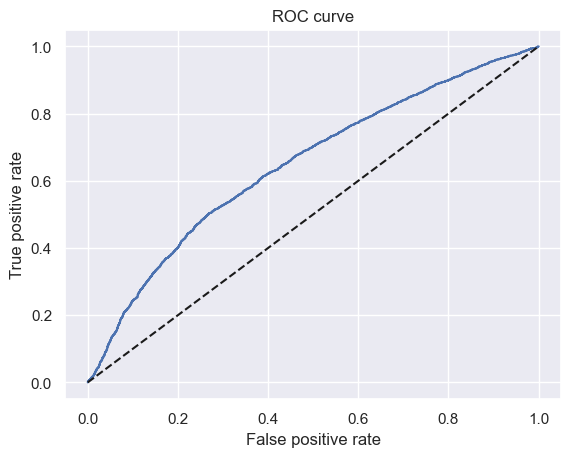

In [98]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [99]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6478953526910095

### Stage 2 - Linear Regression

In [100]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [101]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stat


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [102]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [103]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [104]:
reg_lgd_st_2 = linear_model.LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [105]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.406858e-01
1,grade:A,-6.826892e-02
2,grade:B,-5.083556e-02
3,grade:C,-3.748066e-02
4,grade:D,-2.717310e-02
5,grade:E,-1.315941e-02
6,grade:F,-5.260168e-03
7,home_ownership:MORTGAGE,2.832212e-03
8,home_ownership:NONE,1.459035e-01
9,home_ownership:OTHER,-9.475922e-03


### Evaluate

In [106]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/483740359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


<AxesSubplot: xlabel='recovery_rate', ylabel='Density'>

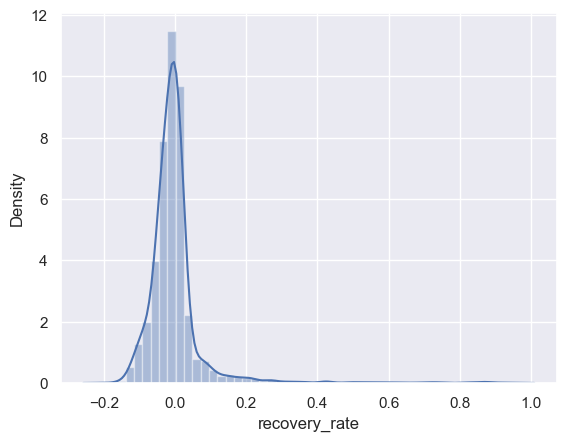

In [107]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [108]:
import pickle
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

### Combine the Models

In [109]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.086840
std,0.049876
min,-0.007634
25%,0.063962
50%,0.100893
75%,0.123155
max,0.236973


In [110]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.086842
std,0.049873
min,0.000000
25%,0.063962
50%,0.100893
75%,0.123155
max,0.236973


## Estimation and Interpretation

### Splitting Data

In [111]:
from sklearn.model_selection import train_test_split

In [119]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead__targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis=1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [120]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis=1)

## Linear Regression

In [121]:
from sklearn import linear_model

reg_ead = linear_model.LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [122]:
reg_ead.coef_

array([-3.03003313e-01, -2.36427664e-01, -1.72023159e-01, -1.19847017e-01,
       -6.76871307e-02, -2.04590687e-02, -6.34334108e-03, -5.53906445e-03,
       -2.42605196e-03, -1.61958178e-03,  5.33951011e-05,  8.96782218e-03,
        7.90478662e-04,  1.26492197e-02,  9.64358711e-02,  1.92304355e-02,
        1.60712024e-02,  2.98491736e-02,  3.96247875e-02,  4.57763031e-02,
        3.70674383e-02,  7.21296921e-02,  5.12867366e-02,  1.87486349e-02,
        4.35052239e-02,  1.31812650e-02,  4.55188198e-03, -1.59147811e-03,
       -4.30527404e-03, -3.63403036e-05,  2.21212590e-06, -1.17265207e-02,
       -6.86560681e-05,  5.02181655e-09,  2.83276933e-04,  4.83323414e-04,
        1.13167801e-02, -1.96598012e-04, -5.08563859e-05, -2.14213020e-03,
        6.78206176e-03,  4.51811020e-04,  9.97480069e-03,  2.16652661e-07])

In [123]:
reg_ead.intercept_

1.1097462811568108

In [124]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.109746e+00
1,grade:A,-3.030033e-01
2,grade:B,-2.364277e-01
3,grade:C,-1.720232e-01
4,grade:D,-1.198470e-01
5,grade:E,-6.768713e-02
6,grade:F,-2.045907e-02
7,home_ownership:MORTGAGE,-6.343341e-03
8,home_ownership:NONE,-5.539064e-03
9,home_ownership:OTHER,-2.426052e-03


### Model Validation

In [125]:
ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis=1)

In [126]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [128]:
ead_targets_test_temp = ead__targets_test.reset_index(drop=True)
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis=1).corr()

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


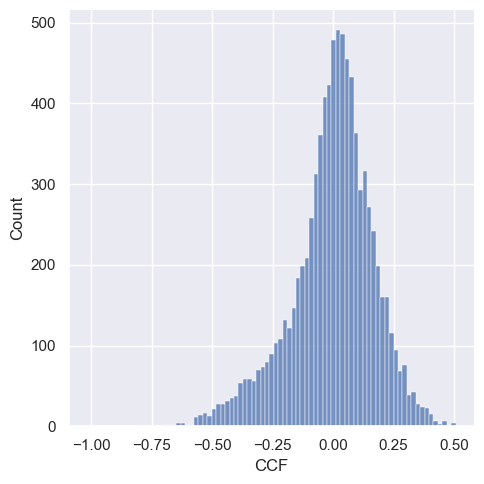

In [129]:
sns.displot(ead__targets_test-y_hat_test_ead)

In [130]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088


In [131]:
y_hat_test_ead = np.where(y_hat_test_ead<0,0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead>1,1, y_hat_test_ead)
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735992
std,0.105127
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.000000


In [132]:
pickle.dump(reg_ead, open('ead_model.sav', 'wb'))

## Expected Loss

In [138]:
loan_data_preprocessed = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_2007_2014_preprocessed.csv')
loan_data_preprocessed.head()

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/4028462300.py:1: DtypeWarning: Columns (21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_2007_2014_preprocessed.csv')


,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [139]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0,inplace=True)
loan_data_preprocessed['mths_since_last_record'].fillna(0,inplace=True)

In [140]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis=1)

In [142]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1']*loan_data_preprocessed['recovery_rate_st_2']

In [143]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']<0,0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']>1,1, loan_data_preprocessed['recovery_rate'])

In [144]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [146]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']<0,0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']>1,1, loan_data_preprocessed['CCF'])

In [147]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF']*loan_data_preprocessed['funded_amnt']

In [148]:
loan_data_inputs_train = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_inputs_test.csv')
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis=1)

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_21530/3472518250.py:2: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_test = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Credit-Risk-Modelling-in-Python/loan_data_inputs_test.csv')


In [157]:
loan_data_inputs_pd.columns.values[1]

'Unnamed: 0'